In [21]:
import pandas as pd
import talib
import matplotlib.pyplot as plt

def load_stock_data_from_csv(filepath):
    df = pd.read_csv(filepath)
    
    # Ensure Date is in datetime format and set as index
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    
    return df

# Load your data
stock_data = load_stock_data_from_csv('../data/AAPL_historical_data.csv')

# Display data samples
print("=== First 5 Rows ===")
print(stock_data.head())

print("\n=== Random 5 Rows ===")
print(stock_data.sample(5))  # Shows 5 random rows

print("\n=== Last 5 Rows ===")
print(stock_data.tail())

print("\n=== Data Types ===")
print(stock_data.dtypes)

print("\n=== Basic Statistics ===")
print(stock_data.describe())

=== First 5 Rows ===
                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

            Dividends  Stock Splits  
Date                                 
1980-12-12        0.0           0.0  
1980-12-15        0.0           0.0  
1980-12-16        0.0           0.0  
1980-12-17        0.0           0.0  
1980-12-18        0.0           0.0  

=== Random 5 Rows ===
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1990-04-2

In [12]:
def validate_stock_data(df):
   
    required_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    missing = [col for col in required_columns if col not in df.columns]
    
    if missing:
        raise ValueError(f"Missing required columns: {missing}")
    
    print("Data validation passed - all required columns present")
    return True

validate_stock_data(stock_data)

Data validation passed - all required columns present


True

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-07-24  224.000000  224.800003  217.130005  218.539993  218.287323   
2024-07-25  218.929993  220.850006  214.619995  217.490005  217.238556   
2024-07-26  218.699997  219.490005  216.009995  217.960007  217.708008   
2024-07-29  216.960007  219.300003  215.750000  218.240005  217.987686   
2024-07-30  219.190002  220.330002  216.119995  218.800003  218.547043   

              Volume  Dividends  Stock Splits      SMA_20      EMA_20  ...  \
Date                                                                   ...   
2024-07-24  61777600        0.0           0.0  224.228500  222.376929  ...   
2024-07-25  51391200        0.0           0.0  224.440500  221.911508  ...   
2024-07-26  41601300        0.0           0.0  224.633500  221.535174  ...   
2024-07-29  36311800        0.0           0.0  225.014500  221.221349  ...   
2024-07-30  4

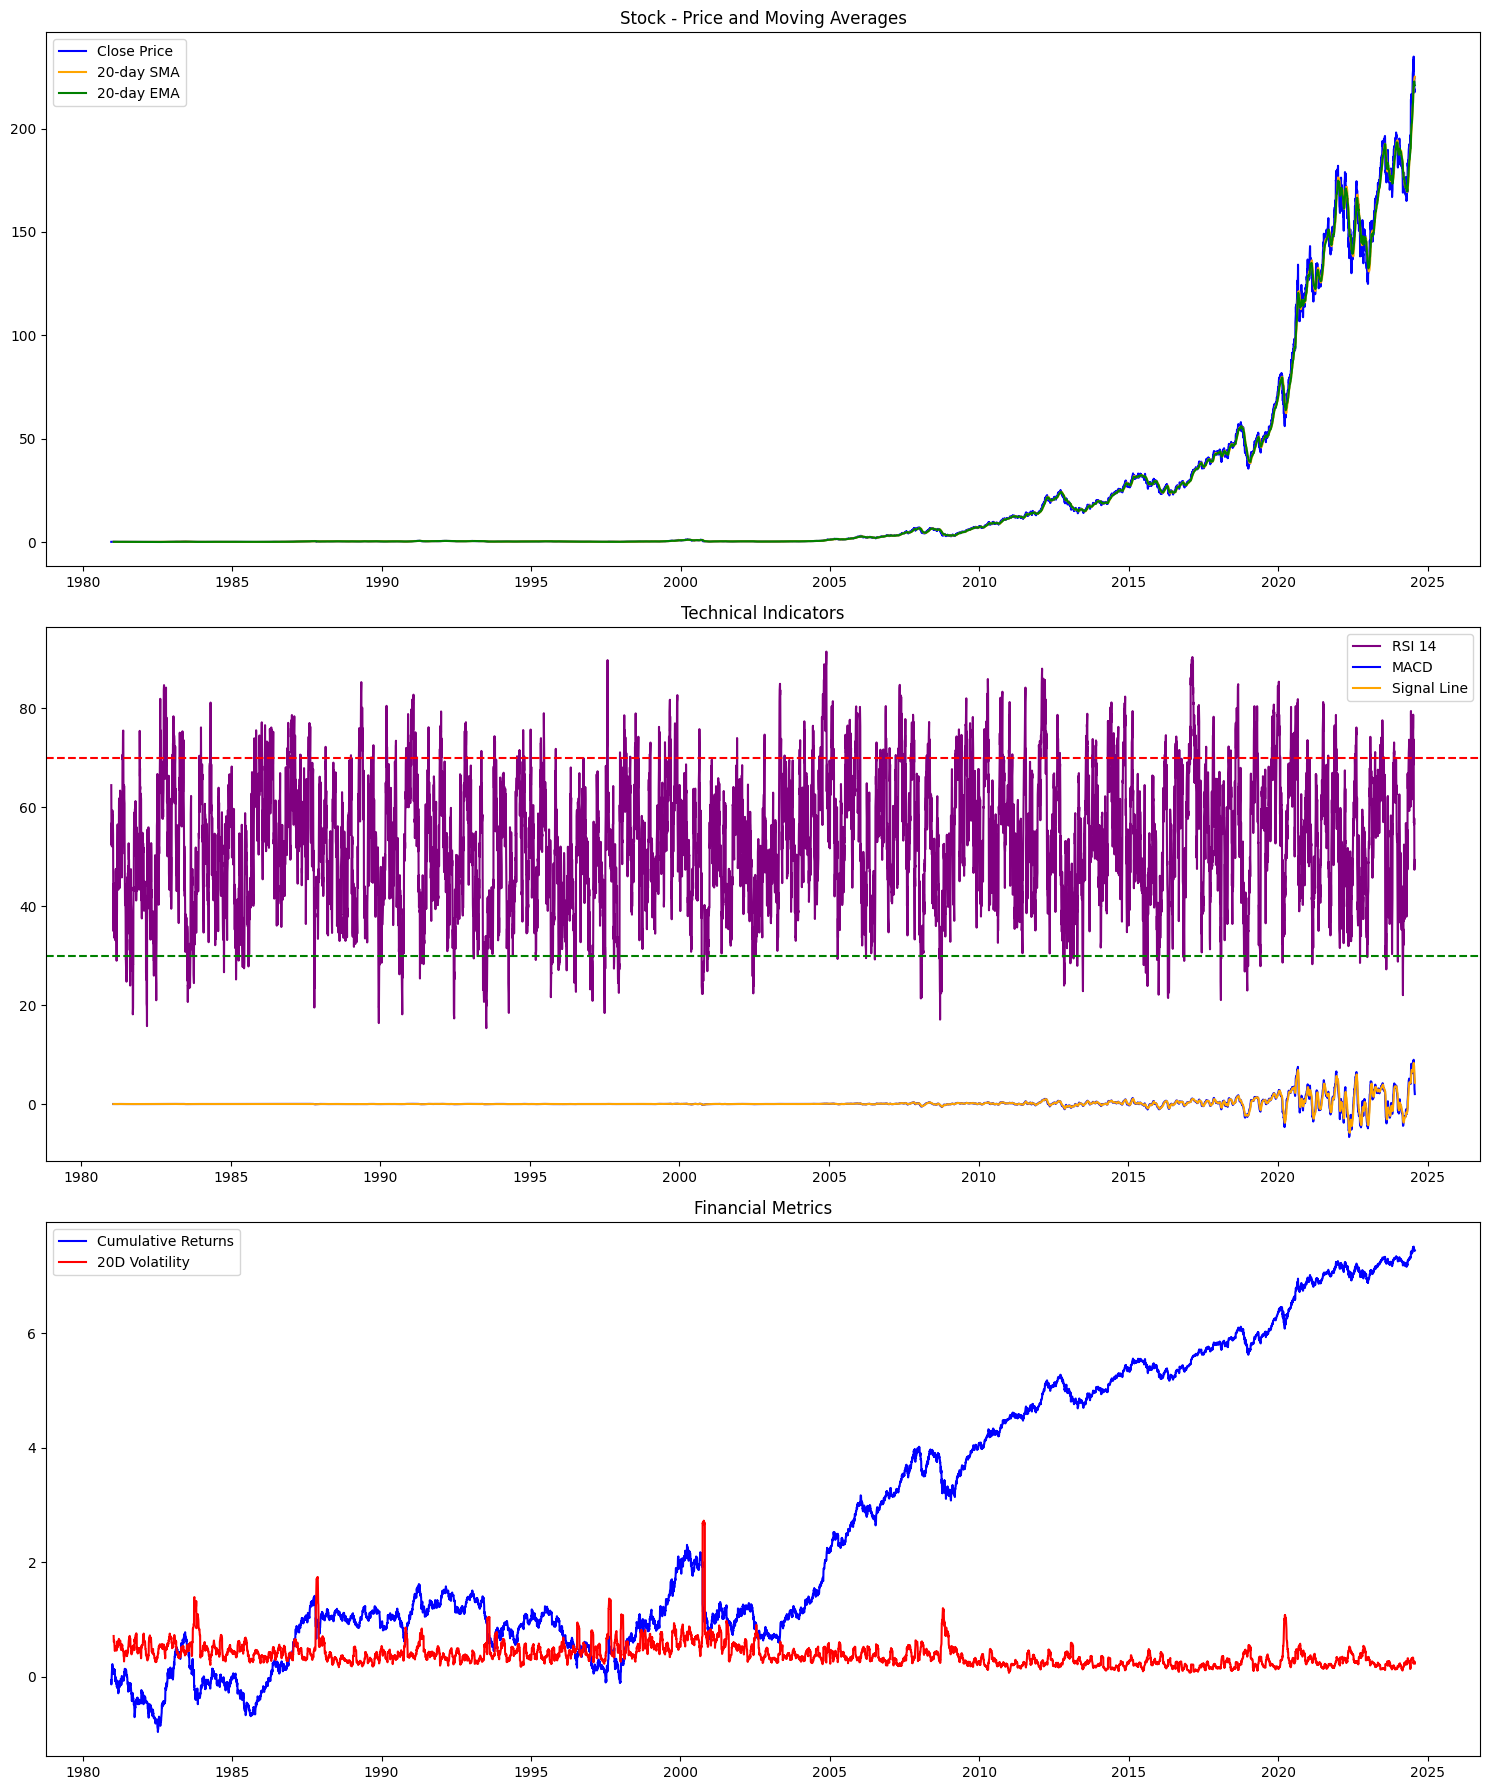

In [20]:
import pandas as pd
import talib
import matplotlib.pyplot as plt
import numpy as np

def load_stock_data(csv_path):
    """Load and prepare stock data from CSV"""
    df = pd.read_csv(csv_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    return df

def calculate_technical_indicators(df):
    """Calculate all technical indicators"""
    # Moving Averages
    df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
    df['EMA_20'] = talib.EMA(df['Close'], timeperiod=20)
    
    # Oscillators
    df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)
    df['MACD'], df['MACD_Signal'], _ = talib.MACD(df['Close'])
    
    # Bollinger Bands
    df['Upper_Band'], df['Middle_Band'], df['Lower_Band'] = talib.BBANDS(df['Close'])
    
    return df

def calculate_financial_metrics(df):
    """Replicate pynance functionality with numpy/pandas"""
    # Returns
    df['Daily_Return'] = np.log(df['Close'] / df['Close'].shift(1))
    df['Cumulative_Return'] = df['Daily_Return'].cumsum()
    
    # Risk metrics
    df['Volatility_20D'] = df['Daily_Return'].rolling(20).std() * np.sqrt(252)
    df['Sharpe_Ratio'] = df['Daily_Return'].mean() / df['Daily_Return'].std() * np.sqrt(252)
    
    # Rolling alpha (using market mean as benchmark)
    market_mean = df['Close'].mean()
    df['Rolling_Alpha'] = df['Close'].rolling(20).mean() - market_mean
    
    return df

def visualize_results(df, ticker='Stock'):
    """Create comprehensive visualization"""
    plt.figure(figsize=(15, 18))
    
    # Price and Moving Averages
    plt.subplot(3, 1, 1)
    plt.plot(df['Close'], label='Close Price', color='blue')
    plt.plot(df['SMA_20'], label='20-day SMA', color='orange')
    plt.plot(df['EMA_20'], label='20-day EMA', color='green')
    plt.title(f'{ticker} - Price and Moving Averages')
    plt.legend()
    
    # Technical Indicators
    plt.subplot(3, 1, 2)
    plt.plot(df['RSI_14'], label='RSI 14', color='purple')
    plt.axhline(70, color='red', linestyle='--')
    plt.axhline(30, color='green', linestyle='--')
    plt.plot(df['MACD'], label='MACD', color='blue')
    plt.plot(df['MACD_Signal'], label='Signal Line', color='orange')
    plt.title('Technical Indicators')
    plt.legend()
    
    # Financial Metrics
    plt.subplot(3, 1, 3)
    plt.plot(df['Cumulative_Return'], label='Cumulative Returns', color='blue')
    plt.plot(df['Volatility_20D'], label='20D Volatility', color='red')
    plt.title('Financial Metrics')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == "__main__":
    try:
        # Load your data
        data = load_stock_data('../data/AAPL_historical_data.csv')
        
        # Calculate indicators
        data = calculate_technical_indicators(data)
        
        # Calculate metrics
        data = calculate_financial_metrics(data)
        
        # Show results
        print(data.tail())
        visualize_results(data)
        
    except Exception as e:
        print(f"Error: {e}")